<a href="https://colab.research.google.com/github/Alymostafa/Co_Project/blob/master/Pattern_Project/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data acquisition**
*   https://github.com/ieee8023/covid-chestxray-dataset

**Feature Extraction**
* Augmentation
* Image Enhancement
* Segmentation
* Dimentionality Reduction Using PCA

**Data Visualization**
* T-SNE

**Note**: Create Folder "data" and move "covid_enhance", "other_enhance" to "data"






## Data Loads


In [0]:
import os
import shutil

In [2]:
!wget https://www.dropbox.com/sh/5nb5kd35zvebm61/AAA6btJYbKHpRdxn6ztjbXNAa?dl=0 -O keras-covid-19.zip

--2020-05-19 21:07:30--  https://www.dropbox.com/sh/5nb5kd35zvebm61/AAA6btJYbKHpRdxn6ztjbXNAa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/5nb5kd35zvebm61/AAA6btJYbKHpRdxn6ztjbXNAa [following]
--2020-05-19 21:07:30--  https://www.dropbox.com/sh/raw/5nb5kd35zvebm61/AAA6btJYbKHpRdxn6ztjbXNAa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d243e06e9202a52a468e71d75.dl.dropboxusercontent.com/zip_download_get/AbYXQ7i7HfsthGn0q0CnuRlTBGJcUukiw6pQTFESW6g9_ike3ZnRJO-uh882jtykxJezM6lXVxtjmbxo_60BEtzQ9XNumQKgExy0L7Hk7xRtLw [following]
--2020-05-19 21:07:32--  https://uc3d243e06e9202a52a468e71d75.dl.dropboxusercontent.com/zip_download_get/AbYXQ7i7HfsthGn0q0CnuRlTBGJcUukiw6pQTFESW6g9_ike3ZnRJO-uh882jtykxJezM6lXVxtjmbxo_

In [3]:
!unzip /content/keras-covid-19.zip

Archive:  /content/keras-covid-19.zip
mapname:  conversion of  failed
 extracting: log.html                
   creating: enhanced_1/
   creating: covid_enhance/
   creating: other_enhance/
 extracting: covid_enhance/gr1_lrg-a.jpg  
 extracting: other_enhance/wong-0002.jpg  
 extracting: other_enhance/wong-0000.jpg  
 extracting: other_enhance/wong-0005.jpg  
 extracting: covid_enhance/gr1_lrg-b.jpg  
 extracting: other_enhance/wong-0004.jpg  
 extracting: other_enhance/wong-0003.jpg  
 extracting: enhanced_1/IM-0751-0001.jpeg  
 extracting: enhanced_1/IM-0761-0001.jpeg  
 extracting: enhanced_1/IM-0145-0001.jpeg  
 extracting: enhanced_1/IM-0143-0001.jpeg  
 extracting: enhanced_1/IM-0487-0001.jpeg  
 extracting: enhanced_1/IM-0629-0001.jpeg  
 extracting: enhanced_1/IM-0266-0001.jpeg  
 extracting: enhanced_1/IM-0694-0001.jpeg  
 extracting: enhanced_1/IM-0154-0001.jpeg  
 extracting: enhanced_1/IM-0379-0001.jpeg  
 extracting: enhanced_1/IM-0706-0001.jpeg  
 extracting: enhanced_1/IM

In [0]:
list_images = os.listdir('/content/enhanced_1')

In [0]:
for i in list_images[:250]:
  shutil.copy2('/content/enhanced_1/'+i,'/content/data/other_enhance/')
  

## Imports

In [7]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from torchvision import transforms
from imutils import paths
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image, display
import numpy as np
from sklearn.preprocessing import StandardScaler
import argparse
from sklearn.decomposition import PCA
import cv2
import os
from torch import optim
from sklearn.preprocessing import OneHotEncoder
import shutil
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from torchvision import models


import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14


##Load Images

In [0]:
dataset = "/content/keras-covid-19/dataset"
dataset_1 = "/content/data"
plot = "/content/keras-covid-19/plot.png" 
model = "/content/keras-covid-19/covid19.model"

In [0]:
args={}
args["dataset"]=dataset
args["plot"]=plot
args["model"]=model
args["dataset_1"] = dataset_1

In [11]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset_1"]))
data = []
labels = []
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

[INFO] loading images...


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [0]:
sess = tf.Session()

## Model Initialization


In [14]:
data.shape

(1452, 224, 224)

In [0]:
#d1, d2, d3, d4 = data.shape
#data_reshaped = data.reshape((d1, d2*d3*d4))

In [0]:
nsamples, nx, ny = data.shape
d2_train_dataset = data.reshape((nsamples,nx*ny))

In [0]:
X = d2_train_dataset
y = labels

In [0]:
lb = LabelEncoder()
vis_y = lb.fit_transform(y)

In [0]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [0]:
pca = PCA(n_components=1452)
x_transform = pca.fit_transform(X)

In [0]:
X = x_transform

In [0]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [0]:
enc = OneHotEncoder(handle_unknown='ignore')
train_y = train_y.reshape(-1,1)
train_y = enc.fit_transform(train_y).toarray()
test_y = test_y.reshape(-1,1)
test_y = enc.fit_transform(test_y).toarray()

In [24]:
enc.get_feature_names()

array(['x0_covid_enhance', 'x0_other_enhance'], dtype=object)

In [0]:
batch_size = 5

In [0]:
A = tf.Variable(tf.zeros([1452, 2]))
b = tf.Variable(tf.zeros([2]))

In [0]:
data = tf.placeholder(tf.float32, [None,1452]) 
target = tf.placeholder(tf.float32, [None, 2])

In [0]:
# Declare model operations
model_output = tf.subtract(tf.matmul(data, A), b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A))

In [0]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

alpha = tf.constant([0.01])
learning_rate = .01

# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, target))))

# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [30]:
# Declare prediction function
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, target), tf.float32))

# Declare optimizer
my_opt =  tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Visualization


In [0]:
from sklearn.manifold import TSNE

In [0]:
X_embedded = TSNE(n_components=2).fit_transform(X)

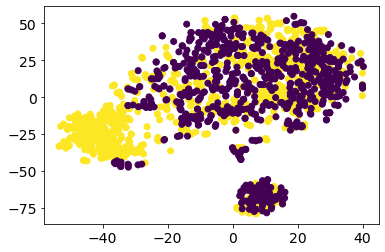

In [38]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=vis_y)

## Training, Testing

In [39]:
# Training loop
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(20000):
    rand_index = np.random.choice(len(train_X), size=batch_size)
    rand_x = train_X[rand_index]
    rand_y = train_y[rand_index]
    sess.run(train_step, feed_dict={data: rand_x, target: rand_y})

    temp_loss = sess.run(loss, feed_dict={data: rand_x, target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={
        data: train_X,
        target: train_y})
    train_accuracy.append(train_acc_temp)

    test_acc_temp = sess.run(accuracy, feed_dict={
        data: test_X,
        target: test_y})
    test_accuracy.append(test_acc_temp)

    if (i + 1) % 75 == 0:
        weights = sess.run(A)
        bias = sess.run(b)
        print('Step #',i+1, 'A =',weights,'b =',bias)
        print('Loss =' ,temp_loss)
        
    print('Training set prediction accuracy :' ,train_acc_temp )
    print('=======================================')
    print('Test set prediction accuracy :' ,test_acc_temp )
    print('=======================================')
    print('loss :' ,temp_loss)
    


Streaming output truncated to the last 5000 lines.
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.5001483]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.50014824]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.5001482]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.5001481]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.50014806]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.500148]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.50014794]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.5001479]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.5001478]
Training set prediction accuracy : 0.5
Test set prediction accuracy : 0.5
loss : [0.50014776]
Training set pre

##Plots, Confusion Matrix

In [0]:
def conf_matrix():
  model_output = tf.subtract(tf.matmul(data, A), b)
  predict_list = []
  for i in test_X:
    feed_dict = {data: [i]}
    classification = sess.run(model_output, feed_dict) 
    predictions = np.argmax(classification, axis=1)
    predict_list.append(predictions)
  a  = np.array(test_y)
  actual = np.argmax(a, axis=1)
  results = confusion_matrix(actual, predict_list) 
  print ('Confusion Matrix :')
  print(results) 
  print ('Accuracy Score :',accuracy_score(actual, predict_list)) 
  print ('Report : ')
  print (classification_report(actual, predict_list))
  

In [0]:
def plot_conf(conf_mat):
  ax= plt.subplot()
  sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted');ax.set_ylabel('True'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['covid', 'non']); ax.yaxis.set_ticklabels(['covid', 'non']);

In [85]:
conf_matrix()

Confusion Matrix :
[[ 49  94]
 [ 23 124]]
Accuracy Score : 0.596551724137931
Report : 
              precision    recall  f1-score   support

           0       0.68      0.34      0.46       143
           1       0.57      0.84      0.68       147

    accuracy                           0.60       290
   macro avg       0.62      0.59      0.57       290
weighted avg       0.62      0.60      0.57       290



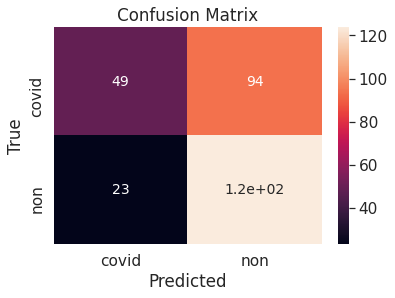

In [116]:
plot_conf(results)

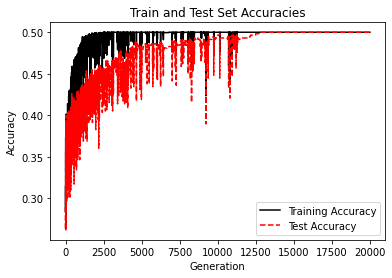

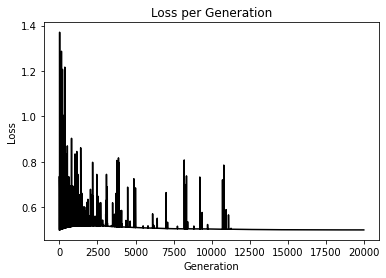

In [86]:
%matplotlib inline


# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()